<a href="https://colab.research.google.com/github/praveen0863/AI-AGENT/blob/main/Heights_and_Weights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
dt=pd.read_csv('/content/SOCR-HeightWeight.csv')

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           25000 non-null  int64  
 1   Height(Inches)  25000 non-null  float64
 2   Weight(Pounds)  25000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 586.1 KB


In [ ]:
x=dt['Height(Inches)']
y=dt['Weight(Pounds)']

In [ ]:
x=dt.drop('Weight(Pounds)',axis=1)
y=dt['Weight(Pounds)']

In [ ]:
x

,Index,Height(Inches)
0,1,65.78331
1,2,71.51521
2,3,69.39874
3,4,68.21660
4,5,67.78781
...,...,...
24995,24996,69.50215
24996,24997,64.54826
24997,24998,64.69855
24998,24999,67.52918


from matplotlib import pyplot as plt
x['Index'].plot(kind='hist', bins=20, title='Index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
x['Height(Inches)'].plot(kind='hist', bins=20, title='Height(Inches)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
x.plot(kind='scatter', x='Index', y='Height(Inches)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Index']
  ys = series['Height(Inches)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = x.sort_values('Index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Index')
_ = plt.ylabel('Height(Inches)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Index'}, axis=1)
              .sort_values('Index', ascending=True))
  xs = counted['Index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = x.sort_values('Index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
x['Index'].plot(kind='line', figsize=(8, 4), title='Index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
x['Height(Inches)'].plot(kind='line', figsize=(8, 4), title='Height(Inches)')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
y

,Weight(Pounds)
0,112.9925
1,136.4873
2,153.0269
3,142.3354
4,144.2971
...,...
24995,118.0312
24996,120.1932
24997,118.2655
24998,132.2682


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init="k-means++",random_state=42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

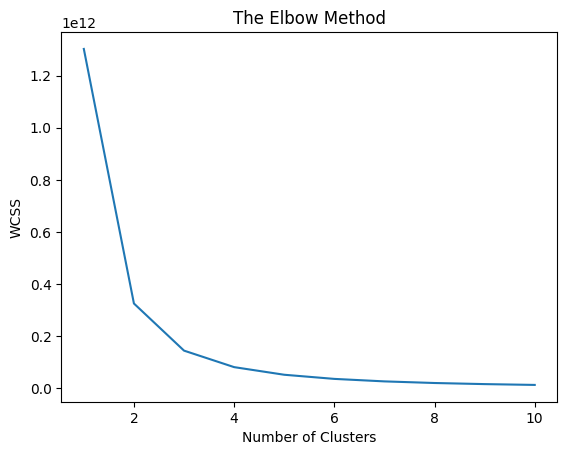

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=5,init="k-means++",random_state=42)
kmeans.fit(x)

KMeans(n_clusters=5, random_state=42)

In [ ]:
lables = kmeans.labels_
dt['cluster'] = lables

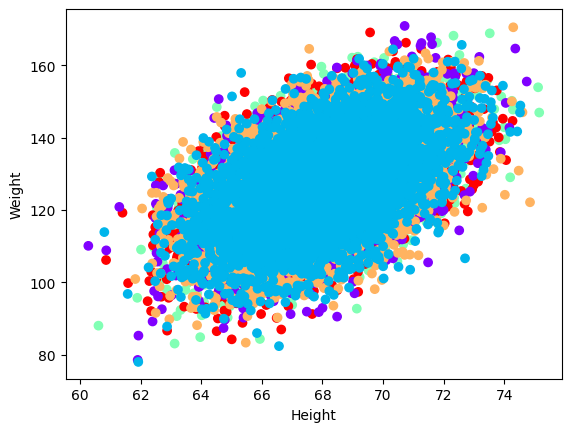

In [ ]:
plt.scatter(dt['Height(Inches)'],dt['Weight(Pounds)'],c=lables,cmap='rainbow')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()